In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1=pd.read_csv("test.csv")
df2=pd.read_csv("train.csv")

In [2]:
df3=pd.concat([df1,df2])
df3.head()


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


In [3]:
df=df3.drop(["Cabin","Name","Fare","Embarked","Ticket"],axis=1)
df.head()

,Age,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,34.5,0,892,3,male,0,NaN
1,47.0,0,893,3,female,1,NaN
2,62.0,0,894,2,male,0,NaN
3,27.0,0,895,3,male,0,NaN
4,22.0,1,896,3,female,1,NaN


In [4]:
m=df.Age.mean()
m

29.881137667304014

In [5]:
df.Age=df.Age.fillna(m)
df.Age.head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [6]:
df.Survived=df.Survived.fillna(0)
df.Survived.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Survived, dtype: float64

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].head()


0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64

In [8]:
df.Survived=df.Survived.astype(int)
df.Survived.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [9]:
df.Age=df.Age.astype(int)
df.Age.head()

0    34
1    47
2    62
3    27
4    22
Name: Age, dtype: int64

In [10]:
df.describe()

,Age,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.685256,0.385027,655.000000,2.294882,0.644003,0.498854,0.261268
std,12.899824,0.865560,378.020061,0.837836,0.478997,1.041658,0.439494
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,655.000000,3.000000,1.000000,0.000000,0.000000
75%,35.000000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000
max,80.000000,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000


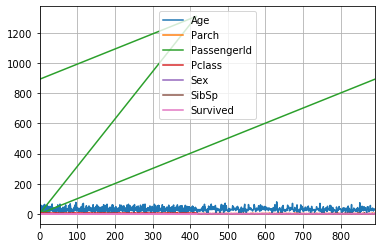

In [11]:
df.plot()
plt.grid()

Text(0, 0.5, 'Survived')

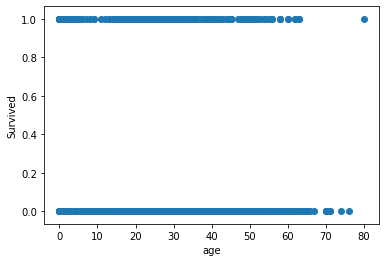

In [12]:
plt.scatter(df.Age,df.Survived)
plt.xlabel("age")
plt.ylabel("Survived")

Text(0, 0.5, 'Survived')

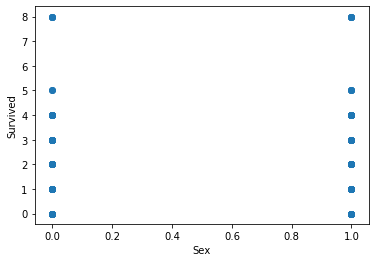

In [13]:
plt.scatter(df.Sex,df.SibSp)
plt.xlabel("Sex")
plt.ylabel("Survived")

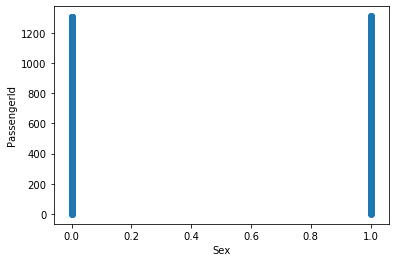

In [14]:
plt.scatter(df.Sex,df.PassengerId)
plt.xlabel("Sex")
plt.ylabel("PassengerId")
plt.show()

In [15]:
x=df.drop('Survived',axis=1)
x.head()

,Age,Parch,PassengerId,Pclass,Sex,SibSp
0,34,0,892,3,1,0
1,47,0,893,3,0,1
2,62,0,894,2,1,0
3,27,0,895,3,1,0
4,22,1,896,3,0,1


In [16]:
y=df.Survived
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.score(x,y)

0.33372216813096367

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.score(x_test,y_test)

0.8396946564885496

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
dt.score(x_test,y_test)

0.8435114503816794

In [24]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
dt1.score(x_test,y_test)

0.8396946564885496

In [26]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
svc.score(x_test,y_test)

0.732824427480916

In [28]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(criterion='mse',n_estimators=200)
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
RF.score(x_test,y_test)

0.48511597938144324